# Visualizing astronomical images and coordinates

## Scaling and Stretching

The astropy.visualization module provides a framework for transforming values in images (and more generally any arrays), typically for the purpose of visualization. Two main types of transformations are provided:

Normalization to the [0:1] range using lower and upper limits where $x$
 represents the values in the original image:  
 
 $y = {{x - v_{min}} \over {v_{max} - v_{min}}}$

Stretching of values in the [0:1] range to the [0:1] range using a linear or non-linear function:

 $z=f(y)$

# displaying a bitmap -- imshow (matplotlib)

In [1]:
import astropy.io.fits as fits
import matplotlib.pylab as plt
from astropy.visualization import (MinMaxInterval, LogStretch,
                                   ImageNormalize)

Here we use only the numpy array of the data.

In [2]:
image = fits.getdata('data/w5.fits')

Astropy visualization functions for scaling and stretching

In [3]:
# Scale to image minimum and maximum, stretch with log function
norm = ImageNormalize(image, interval=MinMaxInterval(),
                      stretch=LogStretch())

Note that astronomical images in FITS use origin="lower" which is not the matplotlib default

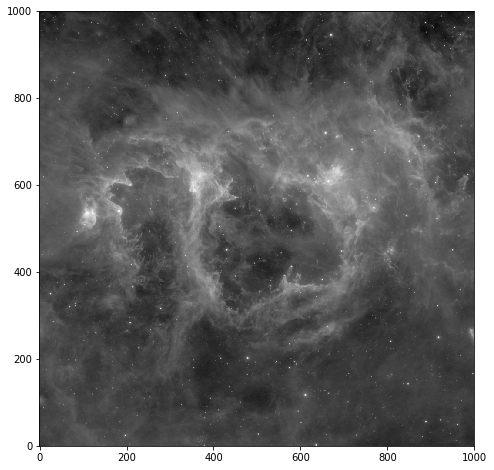

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.imshow(image, norm=norm, origin="lower", cmap='Greys_r');

# Contours with matplotlib

In [5]:
%matplotlib inline
from astropy.visualization import (ManualInterval, LogStretch,
                                   ImageNormalize)
norm = ImageNormalize(image, interval=ManualInterval(vmin=370.0, vmax=1000.0), 
                      stretch=LogStretch())

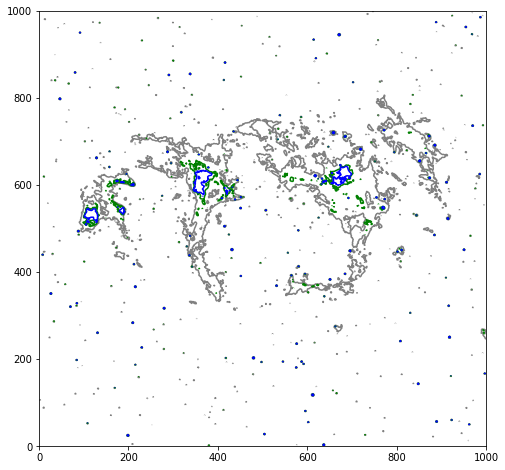

In [6]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.contour(image, [550, 750, 950], origin='lower', 
            colors=['grey', 'green', 'blue']);

See this [contour demo](http://matplotlib.org/examples/pylab_examples/contour_demo.html) from the matplotlib documentation for more to do with contours

# Adding coordinates (wcsaxes)

Prior to this point, we have visualized numpy arrays

In [7]:
from astropy.wcs import WCS

hdu = fits.open('data/w5.fits')[0]
wcs = WCS(hdu.header)

In the case the World Coordinate System is a simple tangent projection

In [8]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 43.46  60.38  
CRPIX : 500.5  500.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.003  0.003  
NAXIS : 1000  1000

In [9]:
norm = ImageNormalize(hdu.data, interval=MinMaxInterval(),
                     stretch=LogStretch())

Make sure to pick a good [sequential colormap](http://matplotlib.org/users/colormaps.html) and avoid 'jet'!

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
#ax = plt.subplot(projection=wcs)
plt.imshow(hdu.data, norm=norm, cmap='viridis', origin="lower")
plt.grid(color='white', ls='solid')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')


TypeError: set_xlabel() missing 1 required positional argument: 'label'

TypeError: get_tightbbox() takes 2 positional arguments but 3 were given

<Figure size 576x576 with 1 Axes>

# Overlaying markers

In [11]:
from astropy.table import Table
w5tbl = Table.read('data/w5_wise.tbl', format='ascii.ipac')
w5tbl = w5tbl[w5tbl['w4snr'] > 30.0] 

Text(0, 0.5, 'Declination')

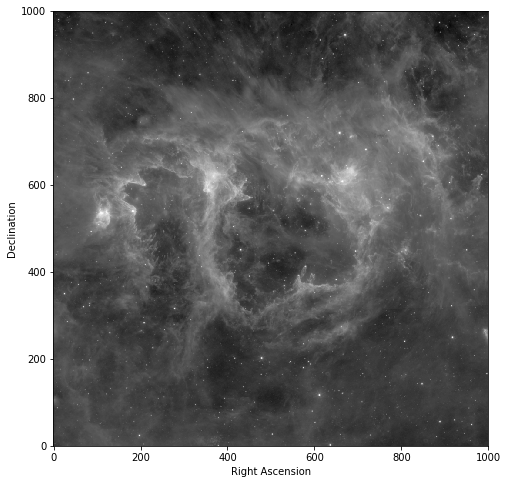

In [13]:
fit = plt.figure(figsize=(8,8))
hdu = fits.open('data/w5.fits')[0]
wcs = WCS(hdu.header)
# ax = plt.subplot(projection=wcs)
plt.imshow(hdu.data, norm=norm, origin="lower", cmap='Greys_r')
#ax.scatter(w5tbl['ra'], w5tbl['dec'], transform=ax.get_transform('world'))
plt.xlabel('Right Ascension')
plt.ylabel('Declination')

## Exercises

_Exercise 1_
* Display the `data/w5.fits` file as a bitmap with linear stretch, greyscale color map, and ZScale scaling
* Overlay black contours at levels of 600 and 800
* Overlay a green coordinate grid

_Exercise 2_

Use the `get_coords_overlay` method of a projected axis to overlay a Galactic grid to the rendering in Exercise 1

Use this code:

```
ax = plt.subplot(projection=wcs)

overlay = ax.get_coords_overlay('galactic')
overlay['l'].set_ticks(color='cyan')
overlay['b'].set_ticks(color='cyan')
overlay['l'].set_axislabel('Galactic Longitude')
overlay['b'].set_axislabel('Galactic Latitude')
overlay.grid(color='cyan', linestyle='solid', alpha=1.0)
```